In [3]:
# Cuando estamos trabjando con analisis de datos muchas veces tenemos que enriquecer nuestro problema con nfrmación de contexto.
# La maldición dimensión, en estadistica,  por cada variable quey oagrego en mi conjunto de datos, voy a necesitar exponencialmente más muestras
# para poder tener la misma relevancia estadistica

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Generar una muestra
np.random.seed(42)

x = 3*np.random.rand(200)
y = 20*x + 2*np.random.rand(200)

x = x.reshape(200,1)
y = y.reshape(200,1)

print(x)
print(y)

[[1.12362036]
 [2.85214292]
 [2.19598183]
 [1.79597545]
 [0.46805592]
 [0.46798356]
 [0.17425084]
 [2.59852844]
 [1.80334504]
 [2.12421773]
 [0.06175348]
 [2.90972956]
 [2.49732792]
 [0.63701733]
 [0.5454749 ]
 [0.55021353]
 [0.91272673]
 [1.57426929]
 [1.29583506]
 [0.87368742]
 [1.83555868]
 [0.41848158]
 [0.87643395]
 [1.09908553]
 [1.36820995]
 [2.35552788]
 [0.59902135]
 [1.54270332]
 [1.77724371]
 [0.13935124]
 [1.82263456]
 [0.51157237]
 [0.19515478]
 [2.84665661]
 [2.8968961 ]
 [2.42519204]
 [0.91384131]
 [0.29301634]
 [2.05269908]
 [1.32045748]
 [0.3661147 ]
 [1.48553073]
 [0.10316556]
 [2.72796121]
 [0.77633994]
 [1.98756685]
 [0.93513323]
 [1.56020406]
 [1.64013084]
 [0.55456337]
 [2.90875388]
 [2.32539847]
 [2.81849682]
 [2.68448205]
 [1.79369994]
 [2.76562271]
 [0.26547751]
 [0.58794859]
 [0.13568187]
 [0.97599099]
 [1.16603187]
 [0.8140471 ]
 [2.48621253]
 [1.07025998]
 [0.84280353]
 [1.62808825]
 [0.42277267]
 [2.40659094]
 [0.22365193]
 [2.96066081]
 [2.31673431]
 [0.59

In [5]:
# Unir lo spares para graficar. hstack permite pasarle los  dos vectores y unirlos en uno solo.
xy = np.hstack([x, y])
print(xy.shape)

(200, 2)


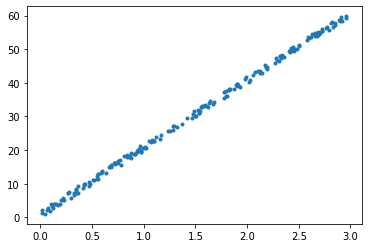

In [18]:
plt.plot(xy[:,0], xy[:,1], '.')
plt.show()
# TENEMOS UN CONJUNTO DE DATOS ALTAMENTE CORRELACIONADO.
# Si lograramos escribir

In [15]:
xy_centrado = xy - np.mean(xy, axis = 0)

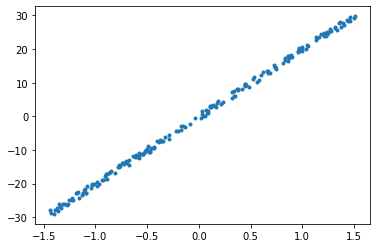

In [8]:
plt.plot(xy_centrado[:,0], xy_centrado[:,1], '.')
plt.show()

In [9]:
# Para buscar las componentes principales, se centraron los datos.
# Necesitamos calcular un problema. Estas componentes las que buscan un D tal que maximiza la función. De la traza de D transpuesto.
#  Tr(DT*XT*XD)
# Al seer una maximiación se le pone una restricción de norma 1 DT*D=1 esto limita la cantida de soluciones.Si no seria siempre posible encontrar una solución tal que siquiegra creciendo.

# Autovalores y autovectores de  xy_centrado.
# Con esto puedo calcular D.
# El vector asociado con el autovalor mas grande nos indica la varianza.
autovalores, autovectores = np.linalg.eig(xy_centrado.T.dot(xy_centrado))
print(autovectores)

[[-0.99875285 -0.04992746]
 [ 0.04992746 -0.99875285]]


In [10]:
%run "..\\funciones_auxiliares\\graficarVectores.ipynb"

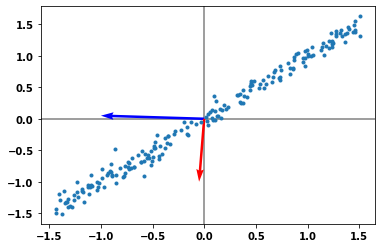

In [11]:
graficarVectores(autovectores.T, ['blue', 'red'])

#Conviene amplificar el autovector, la amplitud del autovector no iporta, si no cual el autovector que está relacionado cpon el autovalor
# mas grade, s el autovalro el que define cual es la direccion que contiene mas información.

plt.plot(xy_centrado[:, 0], xy_centrado[:, 1]/20, '.')

plt.show()

In [12]:
# El autovetor amplidao está relacionado con el autovector que más tiene importancia en término de datos, el más grande.
print(autovalores)

[1.85050946e+00 6.28759594e+04]


In [13]:
# Para ver esto podemos graficar con nuestro nuevo patrón de referencia.

xy_nuevo = autovectores.T.dot(xy_centrado.T)

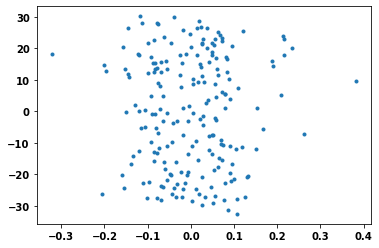

In [15]:
plt.plot(xy_nuevo[0, :], xy_nuevo[1, :], '.')

plt.show()
# Apreciamos la nube de datos, de algo que estab alinealmente relacionado. Y ahora estamos en el escenario ideal, los puntos se espariceron en el espacio.
# Nos podemos quedar con la variable i que está caputardno el 80% de todos los datos